##### Import Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

##### Load dataframe from 2_data_Pre_Processing output (data/CLEANED_2022_SAIPE_DATA.xlsx)

In [3]:
clean_data_filepath = f'/Users/dillon/Desktop/portfolio/census_Poverty/data/CLEANED_2022_SAIPE_DATA.xlsx'
df = pd.read_excel(clean_data_filepath)

##### Check data

In [4]:
df.head()

,STATE_FIPS_ID,POSTAL_CODE,REGION_NAME,ALL_AGES_POVERTY_ESTIMATE,ALL_AGES_90_CI_LOWER_BOUND,ALL_AGES_90_CI_UPPER_BOUND,ALL_AGES_POVERTY_PERCENT,ALL_AGES_90_CI_LOWER_PERCENT,ALL_AGES_90_CI_UPPER_PERCENT,0_17_POVERTY_ESTIMATE,...,5_17_90_CI_UPPER_PERCENT,MEDIAN_HOUSEHOLD_INCOME,MEDIAN_HOUSEHOLD_INCOME_90_CI_LOWER_BOUND,MEDIAN_HOUSEHOLD_INCOME_90_CI_UPPER_BOUND,0_4_POVERTY_ESTIMATE,0_4_90_CI_LOWER_BOUND,0_4_90_CI_UPPER_BOUND,0_4_POVERTY_PERCENT,0_4_CI_LOWER_PERCENT,0_4_UPPER_PERCENT
0,0,US,United States,40951625,40691315,41211935,12.6,12.5,12.7,11582950,...,15.7,74755,74607,74903,3141107,3093587,3188627,17.4,17.1,17.7
1,1,AL,Alabama,798469,780933,816005,16.2,15.8,16.6,237861,...,21.6,59703,58986,60420,68982,64247,73717,24.4,22.7,26.1
2,2,AK,Alaska,77305,73349,81261,10.8,10.2,11.4,23113,...,13.3,88072,85702,90442,7304,6283,8325,16.1,13.8,18.4
3,4,AZ,Arizona,904567,882773,926361,12.5,12.2,12.8,250329,...,15.7,74355,73441,75269,69229,63677,74781,18.0,16.6,19.4
4,5,AR,Arkansas,481650,467218,496082,16.3,15.8,16.8,144789,...,20.8,55505,54535,56475,42721,39225,46217,24.7,22.7,26.7


----
##### ***1*** - National level data EDA
***Filter dataframe instance to only national level (where POSTAL_CODE = 'US')***

In [5]:
df_national = df[df['POSTAL_CODE'] == 'US']

In [6]:
df_national.head()

,STATE_FIPS_ID,POSTAL_CODE,REGION_NAME,ALL_AGES_POVERTY_ESTIMATE,ALL_AGES_90_CI_LOWER_BOUND,ALL_AGES_90_CI_UPPER_BOUND,ALL_AGES_POVERTY_PERCENT,ALL_AGES_90_CI_LOWER_PERCENT,ALL_AGES_90_CI_UPPER_PERCENT,0_17_POVERTY_ESTIMATE,...,5_17_90_CI_UPPER_PERCENT,MEDIAN_HOUSEHOLD_INCOME,MEDIAN_HOUSEHOLD_INCOME_90_CI_LOWER_BOUND,MEDIAN_HOUSEHOLD_INCOME_90_CI_UPPER_BOUND,0_4_POVERTY_ESTIMATE,0_4_90_CI_LOWER_BOUND,0_4_90_CI_UPPER_BOUND,0_4_POVERTY_PERCENT,0_4_CI_LOWER_PERCENT,0_4_UPPER_PERCENT
0,0,US,United States,40951625,40691315,41211935,12.6,12.5,12.7,11582950,...,15.7,74755,74607,74903,3141107,3093587,3188627,17.4,17.1,17.7


***Display information of interest***

In [7]:
print('Location: ' + df_national['REGION_NAME'].values[0]
      + '\n-----\nPoverty Estimate for ALL Ages (int): ' + str(df_national['ALL_AGES_POVERTY_ESTIMATE'].values[0])
      + '\nPoverty Estimate for ALL Ages (percent): ' + str(df_national['ALL_AGES_POVERTY_PERCENT'].values[0]) + '%'
      + '\n-----\nPoverty Estimate for Ages 0-17 (int): ' + str(df_national['0_17_POVERTY_ESTIMATE'].values[0])
      + '\nPoverty Estimate for Ages 0-17 (percent): ' + str(df_national['0_17_POVERTY_PERCENT'].values[0]) + '%'
      + '\n-----\nMedian Household Income: $' + str(df_national['MEDIAN_HOUSEHOLD_INCOME'].values[0])
      )

Location: United States
-----
Poverty Estimate for ALL Ages (int): 40951625
Poverty Estimate for ALL Ages (percent): 12.6%
-----
Poverty Estimate for Ages 0-17 (int): 11582950
Poverty Estimate for Ages 0-17 (percent): 16.3%
-----
Median Household Income: $74755


***Create bar chart of poverty rates (national)***

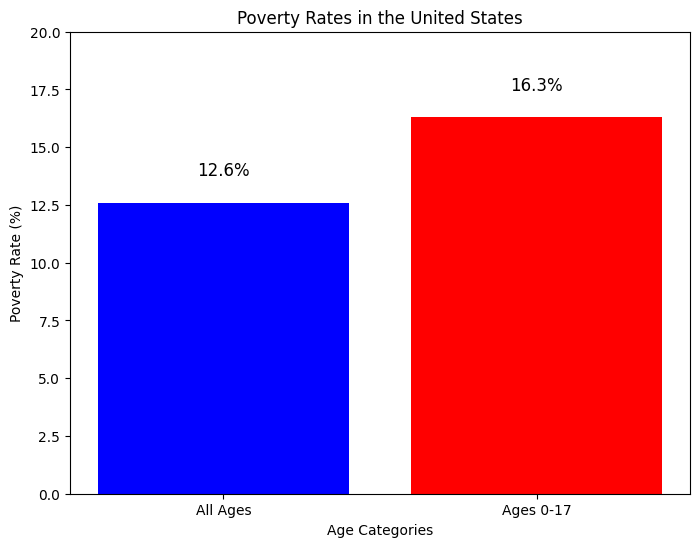

In [8]:
# Data
categories = ['All Ages', 'Ages 0-17']
all_ages_percentage = df_national['ALL_AGES_POVERTY_PERCENT'].values[0]
ages_0_17_percentage = df_national['0_17_POVERTY_PERCENT'].values[0]

poverty_percentages = [all_ages_percentage, ages_0_17_percentage]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, poverty_percentages, color=['blue', 'red', 'green'])
plt.xlabel('Age Categories')
plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rates in the United States')
plt.ylim(0, 20)  # Set the y-axis limit to ensure all bars are visible

# Add data labels above the bars
for i, percentage in enumerate(poverty_percentages):
    plt.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

Based on the above National data we can find a few interesting discussions.
1. In the United States, we see a national poverty level of 12.6% in 2022 (40,951,625 individuals). One important note is that this figure accounts for ALL ages - both adults and children.
2. The child poverty rate is significantly higher than the overall poverty rate at 16.3% in 2022 (or 11,582,950 individuals ages 0 to 17).

Overall, these statistics suggest that there is a portion of the population, particularly children, who are experiencing poverty in the United States. While the overall poverty rate is below 13%, the child poverty rate is notably higher, indicating that child poverty remains a concern. Additionally, the median household income provides a snapshot of the economic conditions for the typical American household, which can be used for various policy and economic assessments.

-----
##### ***2*** - State-level EDA
***Filter dataframe instance to only state level (where POSTAL_CODE != 'US')***

In [10]:
df_state = df[df['POSTAL_CODE'] != 'US']

In [18]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1 to 51
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   STATE_FIPS_ID                              51 non-null     int64  
 1   POSTAL_CODE                                51 non-null     object 
 2   REGION_NAME                                51 non-null     object 
 3   ALL_AGES_POVERTY_ESTIMATE                  51 non-null     int64  
 4   ALL_AGES_90_CI_LOWER_BOUND                 51 non-null     int64  
 5   ALL_AGES_90_CI_UPPER_BOUND                 51 non-null     int64  
 6   ALL_AGES_POVERTY_PERCENT                   51 non-null     float64
 7   ALL_AGES_90_CI_LOWER_PERCENT               51 non-null     float64
 8   ALL_AGES_90_CI_UPPER_PERCENT               51 non-null     float64
 9   0_17_POVERTY_ESTIMATE                      51 non-null     int64  
 10  0_17_90_CI_LOWER_BOUND           

In [19]:
df_state.describe()

,STATE_FIPS_ID,ALL_AGES_POVERTY_ESTIMATE,ALL_AGES_90_CI_LOWER_BOUND,ALL_AGES_90_CI_UPPER_BOUND,ALL_AGES_POVERTY_PERCENT,ALL_AGES_90_CI_LOWER_PERCENT,ALL_AGES_90_CI_UPPER_PERCENT,0_17_POVERTY_ESTIMATE,0_17_90_CI_LOWER_BOUND,0_17_90_CI_UPPER_BOUND,...,5_17_90_CI_UPPER_PERCENT,MEDIAN_HOUSEHOLD_INCOME,MEDIAN_HOUSEHOLD_INCOME_90_CI_LOWER_BOUND,MEDIAN_HOUSEHOLD_INCOME_90_CI_UPPER_BOUND,0_4_POVERTY_ESTIMATE,0_4_90_CI_LOWER_BOUND,0_4_90_CI_UPPER_BOUND,0_4_POVERTY_PERCENT,0_4_CI_LOWER_PERCENT,0_4_UPPER_PERCENT
count,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,28.960784,8.029730e+05,7.864464e+05,8.194997e+05,12.360784,11.984314,12.737255,2.271167e+05,2.179339e+05,2.362995e+05,...,15.874510,74491.627451,73351.647059,75631.607843,61590.313725,57504.627451,65676.000000,16.750980,15.211765,18.290196
std,15.832828,9.440422e+05,9.331098e+05,9.549840e+05,2.579076,2.561513,2.607985,2.808456e+05,2.742895e+05,2.874131e+05,...,4.290774,12250.938909,12047.736742,12475.758106,75015.009716,71953.402341,78083.919448,4.348258,4.327986,4.429278
min,1.000000,6.355500e+04,5.938100e+04,6.736300e+04,7.400000,7.000000,7.800000,1.256900e+04,1.113800e+04,1.400000e+04,...,7.700000,52788.000000,51910.000000,53666.000000,3454.000000,2855.000000,4053.000000,9.100000,7.300000,10.900000
25%,16.500000,2.061495e+05,1.977525e+05,2.145465e+05,10.550000,10.150000,10.850000,5.963600e+04,5.473850e+04,6.453350e+04,...,12.900000,66847.000000,66188.000000,67506.000000,16296.500000,14315.000000,18278.000000,13.500000,11.750000,15.050000
50%,29.000000,5.457730e+05,5.321610e+05,5.593850e+05,11.900000,11.700000,12.300000,1.530140e+05,1.443780e+05,1.616500e+05,...,15.200000,72279.000000,71320.000000,73348.000000,42494.000000,37820.000000,46217.000000,16.000000,14.500000,17.900000
75%,41.500000,8.863295e+05,8.647085e+05,9.079505e+05,13.350000,13.100000,13.600000,2.501185e+05,2.378040e+05,2.624330e+05,...,17.700000,84090.500000,83345.500000,85172.500000,69660.500000,64527.500000,75078.500000,19.150000,18.100000,20.500000
max,56.000000,4.673718e+06,4.623575e+06,4.723861e+06,19.200000,18.700000,19.700000,1.413051e+06,1.378798e+06,1.447304e+06,...,27.500000,99897.000000,97530.000000,102264.000000,389616.000000,373089.000000,406143.000000,26.500000,24.800000,28.200000


- **Count**: There are 51 data points, which include the 50 states plus the District of Columbia.
- **Mean**: The average poverty percentage across these regions is approximately 12.36%.
- **Standard Deviation**: The standard deviation is about 2.58%, indicating that there is some variation in poverty rates between the states, but it's not extremely wide.
- **Minimum**: The lowest recorded poverty percentage among the states is 7.4%.
- **25th Percentile**: About a quarter of the states have a poverty percentage at or below 10.55%.
- **Median**: The median poverty percentage, which reduces the effect of outliers, is 11.9%. This is slightly lower than the mean, suggesting a skew towards higher poverty rates in fewer states.
- **75th Percentile**: About three-quarters of the states have a poverty percentage at or below 13.35%.
- **Maximum**: The highest poverty percentage in any state is 19.2%.
From these statistics, we can infer that while the majority of states have poverty rates close to the national average, there are some states with significantly higher poverty percentages, which increase the mean above the median. The state with the highest poverty rate (19.2%) is an outlier, considerably higher than the 75th percentile of 13.35%.

***Create filled map of Poverty Percentages (ALL Ages) by State***

In [37]:
# Create the choropleth map
fig = px.choropleth(
    df_state,
    locations='POSTAL_CODE',  # State abbreviations
    locationmode='USA-states',  # Location mode set to USA states
    color='ALL_AGES_POVERTY_PERCENT',  # Column for coloring
    color_continuous_scale='Reds',  # Color scale
    scope="usa",  # Focus the map on the USA
    labels={'ALL_AGES_POVERTY_ESTIMATE': 'Poverty Estimate'},  # Label for color scale
    title='All Ages: Poverty Percentages by State'  # Title of the map
)

# Show the figure
fig.show()

The distribution suggests that while many states have moderate poverty rates, a few states have particularly high rates that could be driving the national average up. These states might require more focused interventions to address poverty. It would also be insightful to look at these states' economic conditions, unemployment rates, and other social factors that could be contributing to the higher poverty levels.

***Create filled map of Poverty Percentages (age 0-17) by State***

In [38]:
# Create the choropleth map
fig = px.choropleth(
    df_state,
    locations='POSTAL_CODE',  # State abbreviations
    locationmode='USA-states',  # Location mode set to USA states
    color='0_17_POVERTY_PERCENT',  # Column for coloring
    color_continuous_scale='Blues',  # Color scale
    scope="usa",  # Focus the map on the USA
    labels={'0_17_POVERTY_ESTIMATE': 'Poverty Estimate'},  # Label for color scale
    title='Age 0-17: Poverty Percentages by State'  # Title of the map
)

# Show the figure
fig.show()

-----
##### ***3*** - Median Income Analysis
***Create horizontal bar chart of Median Income by state***

In [26]:
# Filter the data to exclude the 'US' aggregate row and select only the required columns
df_median_income = df[df['POSTAL_CODE'] != 'US'][['POSTAL_CODE', 'MEDIAN_HOUSEHOLD_INCOME']]

# Sort the data by median household income for better visualization
df_median_income_sorted = df_median_income.sort_values('MEDIAN_HOUSEHOLD_INCOME', ascending=True)

# Now we create the bar graph using Plotly
fig_income = px.bar(
    df_median_income_sorted,
    x='MEDIAN_HOUSEHOLD_INCOME',
    y='POSTAL_CODE',
    orientation='h',
    title='Median Household Incomes by State',
    labels={'MEDIAN_HOUSEHOLD_INCOME': 'Median Household Income', 'POSTAL_CODE': 'State'},
    color='MEDIAN_HOUSEHOLD_INCOME',
    color_continuous_scale=px.colors.sequential.Greens
)

fig_income.show()

***Create filled map of Median Household Income by state***

In [36]:
# Create the choropleth map
fig = px.choropleth(
    df_state,
    locations='POSTAL_CODE',  # State abbreviations
    locationmode='USA-states',  # Location mode set to USA states
    color='MEDIAN_HOUSEHOLD_INCOME',  # Column for coloring
    color_continuous_scale='Greens',  # Color scale
    scope="usa",  # Focus the map on the USA
    labels={'MEDIAN_HOUSEHOLD_INCOME': 'Median Household Income'},  # Label for color scale
    title='Median Income by State'  # Title of the map
)

# Show the figure
fig.show()

***Create scatter plot of Poverty Rate vs. Median Household Income by state***

In [35]:
# Create the scatter plot using Plotly
fig_scatter = px.scatter(
    df_state,
    x='MEDIAN_HOUSEHOLD_INCOME',
    y='ALL_AGES_POVERTY_PERCENT',
    text='POSTAL_CODE',  # Display state abbreviations on the plot
    title='Poverty Rate vs. Median Household Income by State',
    labels={
        'MEDIAN_HOUSEHOLD_INCOME': 'Median Household Income ($)',
        'ALL_AGES_POVERTY_PERCENT': 'All Ages Poverty Rate (%)'
    },
    color='ALL_AGES_POVERTY_PERCENT',  # Color the points by poverty rate
    color_continuous_scale=px.colors.sequential.Reds
)

# Adding state labels to the points for better readability
fig_scatter.update_traces(textposition='top center')

1. **Inverse Relationship**: As expected, there is a clear inverse relationship between the median household income and the poverty rate. States with higher median incomes generally have lower poverty rates.
2. **High Poverty and Low Income**: States like Mississippi (MS), Louisiana (LA), West Virginia (WV), and Arkansas (AR) appear in the top left corner, indicating they have higher poverty rates and lower median household incomes.
3. **Low Poverty and High Income**: Conversely, states such as New Hampshire (NH), Maryland (MD), New Jersey (NJ), and Hawaii (HI) are located in the bottom right, showing they have lower poverty rates and higher median household incomes.
4. **Outliers**: The District of Columbia (DC) stands out as an outlier with a high median income but also a high poverty rate, suggesting a large income disparity within the district.
5. **Middle Cluster**: A large cluster of states falls around the center of the plot, indicating a grouping of states with moderate income levels and poverty rates. This cluster suggests a level of consistency in economic conditions across a significant portion of the country.
6. **Regional Patterns**: While this plot doesn't explicitly show regional groupings, you can infer regional trends based on the states' abbreviations. For example, Southern states tend to have lower median incomes and higher poverty rates.
7. **Data Spread**: The spread of the data points indicates variability in the strength of the correlation between median household income and poverty rates among states. For instance, some states with similar median incomes have different poverty rates, which could be due to other socio-economic factors not captured in this plot.

-----
***4*** - Actions and Insights: Conclusion

From the visualizations and data analysis performed on the provided dataset, several actionable insights can be derived:

1. **Targeted Poverty Alleviation Programs**: States with high poverty rates and low median household incomes may benefit from increased federal and state assistance programs. Policy-makers could focus on creating or expanding education and job training programs to improve employment opportunities, which in turn can help raise median incomes and reduce poverty.
2. **Income Disparity Analysis**: In areas like the District of Columbia, which exhibit high median incomes alongside high poverty rates, local governments could investigate the root causes of such income disparities. This may include studying the cost of living, housing affordability, and wage distribution within the job market.
3. **Economic Development Initiatives**: States with lower median household incomes could be targets for economic development initiatives. This might involve attracting new businesses, supporting small businesses, improving infrastructure, or providing tax incentives for industries that offer higher-paying jobs.
4. **Healthcare and Education Accessibility**: Improving access to healthcare and education can be a powerful tool in reducing poverty. Investments in these areas can lead to better health outcomes and higher earning potential over the long term.
5. **Customized State Policies**: Each state has a unique economic environment. The data suggests that a one-size-fits-all approach may not be effective. Instead, states should tailor their economic policies to address their specific challenges and opportunities.
6. **Addressing Underlying Issues**: For states that are outliers or those that don't follow the general inverse trend between income and poverty, it's crucial to understand the underlying issues. This could include examining factors such as the availability of full-time work, the impact of part-time work on poverty rates, access to childcare, or other social services.
7. **Strengthening Social Safety Nets**: States with higher poverty rates might need to strengthen their social safety nets. This can include ensuring adequate food security, access to affordable housing, and financial assistance for those in need.
8. **Regional Collaboration**: States that share similar economic profiles could benefit from regional collaboration to address common issues such as poverty, unemployment, and economic development.
9. **Monitoring and Evaluation**: Implementing robust monitoring and evaluation systems to track the effectiveness of poverty reduction programs can help ensure that resources are being used effectively and that programs are adjusted based on outcomes.

These insights can guide policy-makers, community leaders, and stakeholders in making informed decisions to foster economic growth and reduce poverty. Each insight should be considered within the context of broader economic trends and the specific needs of each state's population.